In [1]:
import pandas as pd
import numpy as np

In [2]:
sapFile = 'C:\Moayad\Workspaces for programming\Jupyter\SE Project\CSVs\SAP.csv'
basfFile = 'C:\Moayad\Workspaces for programming\Jupyter\SE Project\CSVs\BAS.DE.csv'
daimlerFile = 'C:\Moayad\Workspaces for programming\Jupyter\SE Project\CSVs\DAI.DE.csv'
hpeFile = 'C:\Moayad\Workspaces for programming\Jupyter\SE Project\CSVs\BAS.DE.csv'
teslaFile = 'C:\Moayad\Workspaces for programming\Jupyter\SE Project\CSVs\TSLA.csv'

In [3]:
data = pd.read_csv(sapFile, sep=",",usecols=[0,6],names=['Data','Price'],header=0)

In [4]:
data.head()

Data      Price
0  12/10/2018   871700.0
1  12/11/2018   981800.0
2  12/12/2018   830900.0
3  12/13/2018  1071800.0
4  12/14/2018   673500.0

In [5]:
returns=np.array(data["Price"][:-1],np.float)/np.array(data["Price"][1:],np.float)-1

In [6]:
data["Returns"]=np.append(returns,np.nan)

In [7]:
data

Data      Price   Returns
0    12/10/2018   871700.0 -0.112141
1    12/11/2018   981800.0  0.181610
2    12/12/2018   830900.0 -0.224762
3    12/13/2018  1071800.0  0.591388
4    12/14/2018   673500.0 -0.147360
..          ...        ...       ...
247   12/3/2019   654800.0  0.846588
248   12/4/2019   354600.0       NaN
249         NaN        NaN       NaN
250         NaN        NaN       NaN
251         NaN        NaN       NaN

[252 rows x 3 columns]

In [8]:
def readFile(fileName):
    data=pd.read_csv(fileName,sep=",",usecols=[0,6],names=['Date','Price'],header=0)
    returns=np.array(data["Price"][:-1],np.float)/np.array(data["Price"][1:],np.float)-1
    data["Returns"]=np.append(returns,np.nan)
    data.index=data["Date"]
    # data = data["Returns"][0:-1]
    return data

In [9]:
sapData = readFile(sapFile)
daimlerData = readFile(daimlerFile)

In [10]:
daimlerData.dropna(inplace = True) # |||||||||||||||||||||||||||||||||||||||||
sapData.dropna(inplace = True) # |||||||||||||||||||||||||||||||||||||||||||||

In [11]:
sapData.head()

Date      Price   Returns
Date                                       
12/10/2018  12/10/2018   871700.0 -0.112141
12/11/2018  12/11/2018   981800.0  0.181610
12/12/2018  12/12/2018   830900.0 -0.224762
12/13/2018  12/13/2018  1071800.0  0.591388
12/14/2018  12/14/2018   673500.0 -0.147360

In [12]:
xData = daimlerData["Returns"][0:-1].values.reshape(-1,1)

In [13]:
yData = sapData["Returns"][0:-1]

In [14]:
xData

array([[-1.05384243e-01],
       [ 4.13142560e-01],
       [ 3.25604150e-01],
       [-2.78722290e-01],
       [ 4.23118859e-01],
       [-2.21054353e-01],
       [ 1.03563281e-01],
       [-1.18032639e-01],
       [-5.73172549e-01],
       [ 1.17027237e+00],
       [ 1.18619825e+00],
       [-4.86261952e-01],
       [ 3.44449393e-01],
       [-3.32508197e-01],
       [ 6.19514429e-01],
       [-2.65212366e-01],
       [-2.89326549e-01],
       [ 5.75743265e-01],
       [-1.05484782e-01],
       [ 2.52860139e-01],
       [-2.46504894e-02],
       [ 2.22195657e-01],
       [-1.60817008e-01],
       [-4.15367158e-01],
       [ 2.07758311e+00],
       [-3.05073948e-01],
       [-6.97448684e-02],
       [-1.54470177e-01],
       [-1.91088033e-01],
       [ 5.88877403e-01],
       [-3.32754823e-02],
       [ 3.71322149e-01],
       [-4.79489815e-01],
       [-2.08657591e-01],
       [ 4.92073552e-01],
       [ 3.46400040e-02],
       [-4.86780197e-01],
       [-1.33225339e-01],
       [ 2.2

In [15]:
yData

Date
12/10/2018   -0.112141
12/11/2018    0.181610
12/12/2018   -0.224762
12/13/2018    0.591388
12/14/2018   -0.147360
                ...   
11/25/2019   -0.578047
11/26/2019    0.487948
11/27/2019    0.949495
11/29/2019   -0.636784
12/2/2019    -0.042608
Name: Returns, Length: 247, dtype: float64

In [16]:
from sklearn import datasets, linear_model

In [17]:
goodSapModel = linear_model.LinearRegression()

In [18]:
goodSapModel.fit(xData,yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
goodSapModel.score(xData,yData)

0.0005739583680619553

In [20]:
goodSapModel.coef_

array([0.03006094])

In [21]:
import matplotlib.pyplot as plt

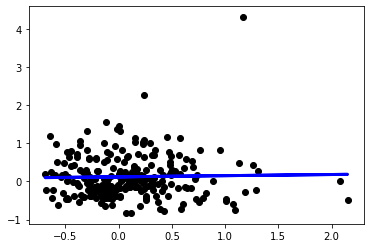

In [25]:
plt.scatter(xData, yData, color='black')
plt.plot(xData, goodSapModel.predict(xData), color='blue', linewidth=3)

([], <a list of 0 Text yticklabel objects>)

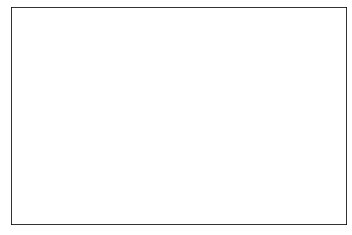

In [23]:
plt.xticks(())
plt.yticks(())

In [24]:
plt.show()